## Imports, Glossary

In [1]:
import pandas as pd
import numpy as np
import os
import glob

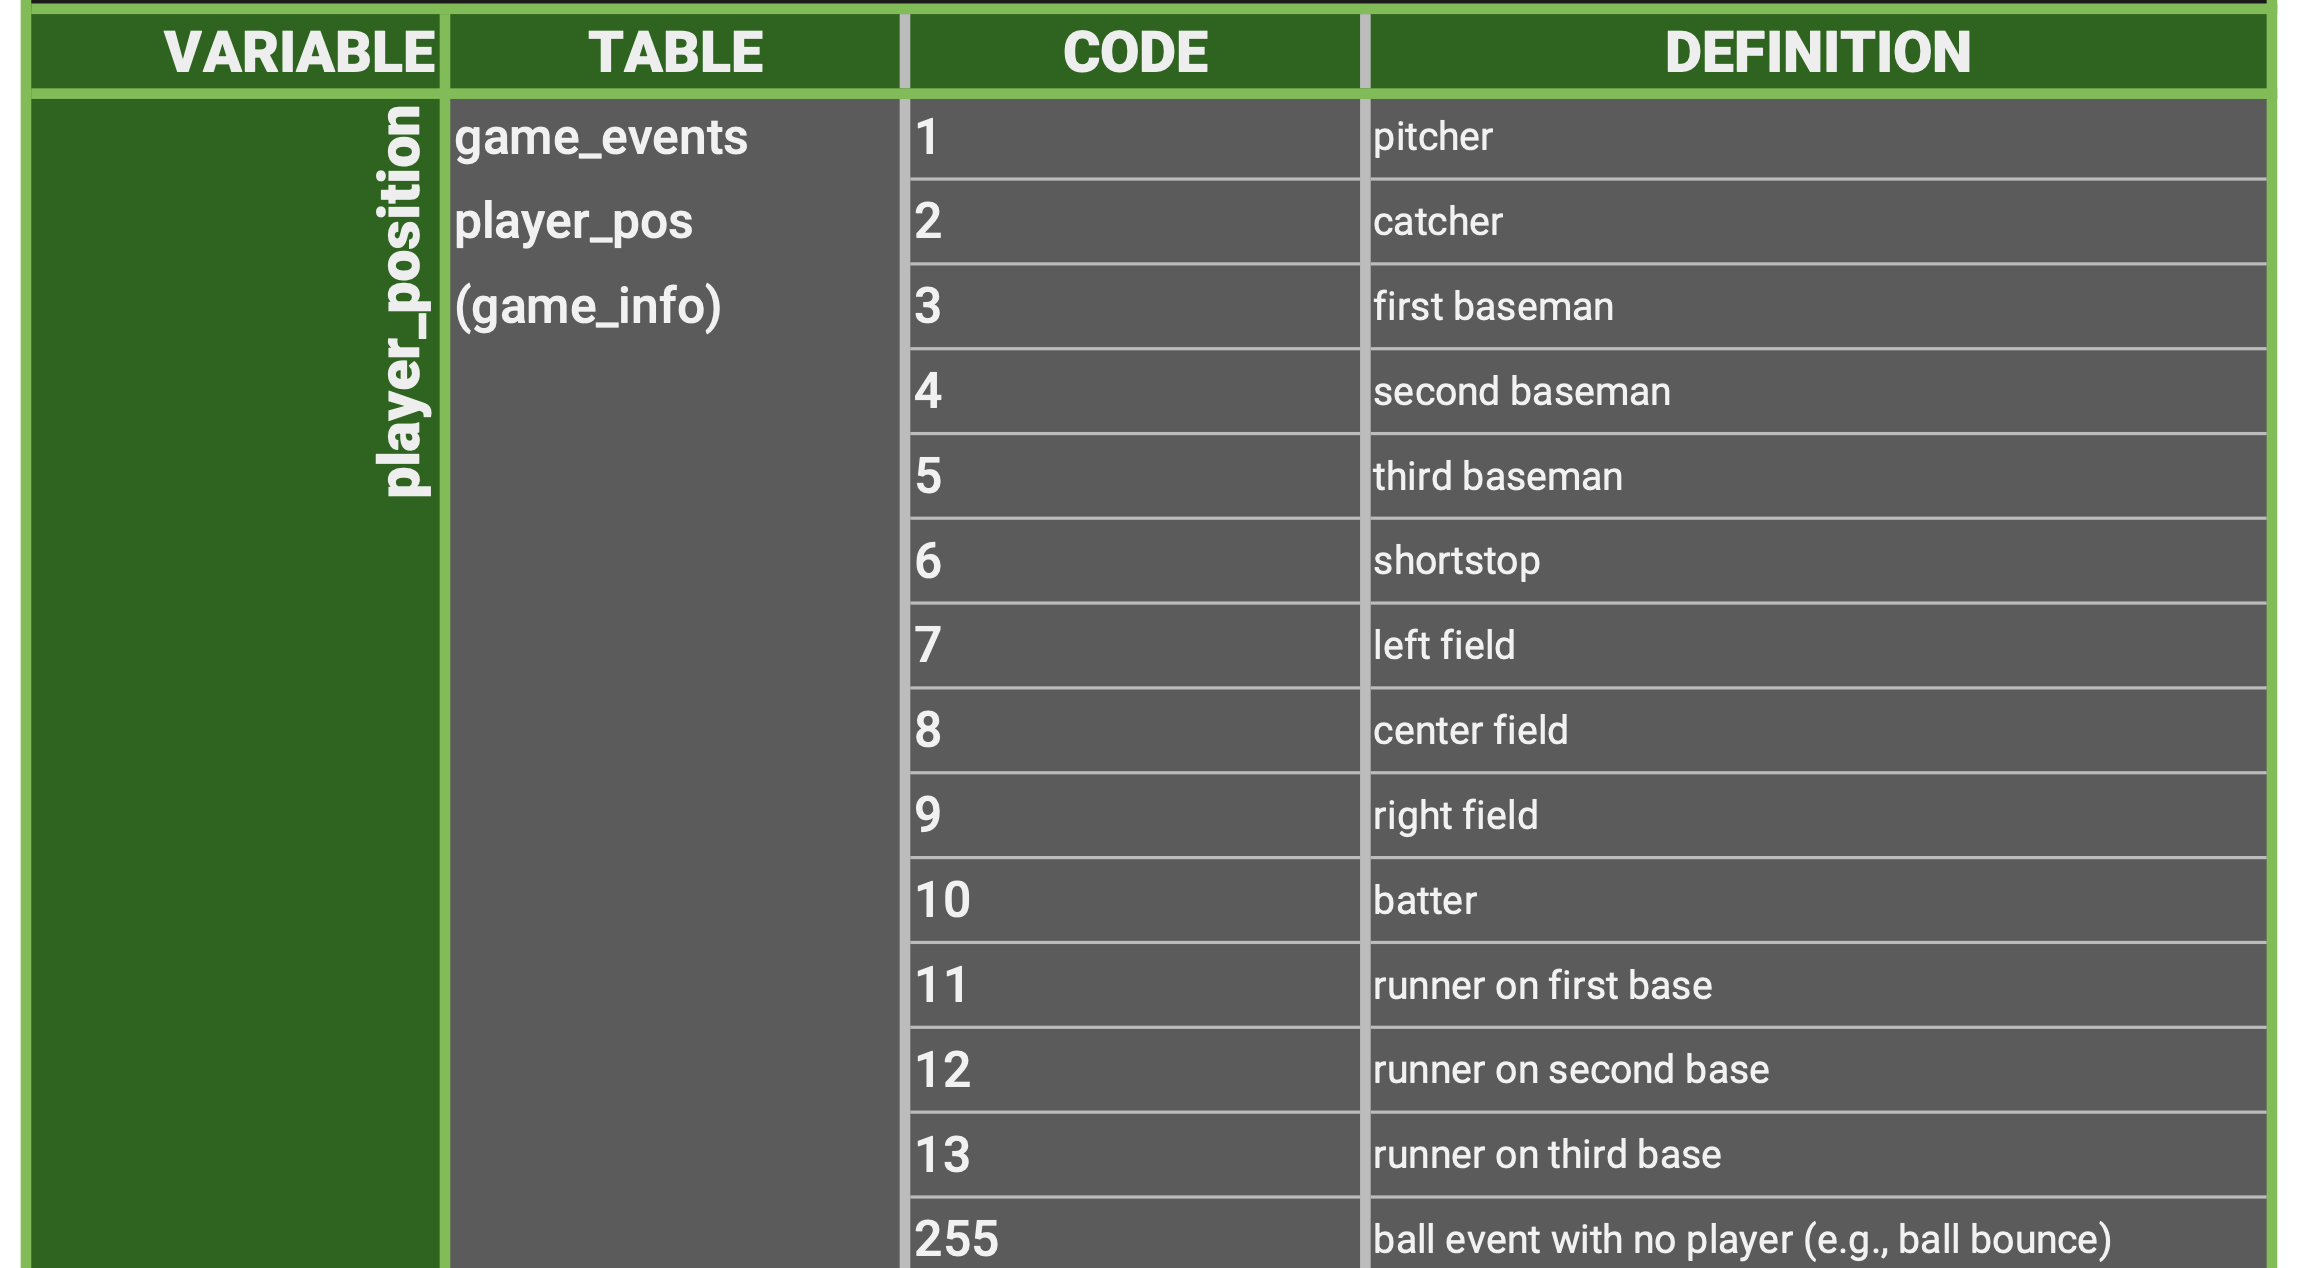

## Team Info CSV

In [2]:
team_info = pd.read_csv('team_info.csv')
'''home_team: Home teams are teams in the same farm system at different levels of minor league (4A is the highest, 1A is the lowest)'''
'''player_id:  a unique 3 digit identifier for farm system players, which carry over across leagues. 203 unique ids among 4 home teams and 2 seasons '''
'''team_year: not actually 1883 and 1884, but 2 consecutive years (1883 about half a season, 1884 a full season)'''
'''away_team: non-unique ids, that are assigned for a series (3-4 games) and reanonymized for each series'''
team_info

,home_team,player_id,team_year,away_team
0,Home4A,383,1883,Vis4AB
1,Home4A,392,1883,Vis4AB
2,Home4A,431,1883,Vis4AB
3,Home4A,461,1883,Vis4AB
4,Home4A,463,1883,Vis4AB
...,...,...,...,...
2093,Home1A,838,1884,Vis1BC
2094,Home1A,877,1884,Vis1BC
2095,Home1A,892,1884,Vis1BC
2096,Home1A,953,1884,Vis1BC


## Game Events CSV

### Season 1883 

In [7]:
# game str; the year and sequential day in the season, if the day ends in .5 it means it was the second in a double header. Year_Day_AwayTeam_HomeTeam
#play id is the identifier for a play (defined as a situation where the ball is live), sequentially listed. generally consist of multiple events (e.g the pitch, what happens to the ball, and end of play)
#at bat corresponds to a batter at the plate, some plays such as pick off throws occur duirng an at bat but are not associated with that at bat 
#play per game: play id for a game 
#tiemstamp is the time in ms, starting from the beginning of a game (first play will be t <60s)
#player position is the position corresponding to glossary (check above)
#game events: id, check summary
root_game_event_path = r'game_events/Season_1883/Home1A/'
vis_paths = [f'Vis1A{i}' for i in ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']]

dfs = [] 
l = 0 
    
for vis_path in vis_paths:
    dir_path = os.path.join(root_game_event_path, vis_path)
    for dir in os.listdir(dir_path):
        full_path = os.path.join(dir_path, dir)
        if os.path.isdir(full_path):  # Check if it's a directory
            l += 1
            file_path = os.path.join(full_path, 'game_events.csv')
            print(f'Going to read in: {file_path}, file #: {l}')
            df = pd.read_csv(file_path)
            dfs.append(df)

game_events1883_home1a = pd.concat(dfs, ignore_index=True)
print(f'done reading in, total length of game_events1883_home1a: {len(game_events1883_home1a)}')

Going to read in: game_events/Season_1883/Home1A/Vis1AB/day_002/game_events.csv, file #: 1
Going to read in: game_events/Season_1883/Home1A/Vis1AB/day_003/game_events.csv, file #: 2
Going to read in: game_events/Season_1883/Home1A/Vis1AB/day_001/game_events.csv, file #: 3
Going to read in: game_events/Season_1883/Home1A/Vis1AC/day_005/game_events.csv, file #: 4
Going to read in: game_events/Season_1883/Home1A/Vis1AC/day_004/game_events.csv, file #: 5
Going to read in: game_events/Season_1883/Home1A/Vis1AC/day_006/game_events.csv, file #: 6
Going to read in: game_events/Season_1883/Home1A/Vis1AC/day_007/game_events.csv, file #: 7
Going to read in: game_events/Season_1883/Home1A/Vis1AD/day_010/game_events.csv, file #: 8
Going to read in: game_events/Season_1883/Home1A/Vis1AD/day_011/game_events.csv, file #: 9
Going to read in: game_events/Season_1883/Home1A/Vis1AD/day_012/game_events.csv, file #: 10
Going to read in: game_events/Season_1883/Home1A/Vis1AE/day_013/game_events.csv, file #: 

In [5]:
root_game_event_path = r'game_events/Season_1883/Home2A/'
vis_paths = [f'Vis2A{i}' for i in ['B', 'C', 'D', 'E']]

dfs = [] 
l = 0 
    
for vis_path in vis_paths:
    dir_path = os.path.join(root_game_event_path, vis_path)
    for dir in os.listdir(dir_path):
        l += 1
        file_path = os.path.join(dir_path, dir, 'game_events.csv')
        print(f'Going to read in: {file_path}, file #: {l}')
        df = pd.read_csv(file_path)
        dfs.append(df)

game_events1883_home2a = pd.concat(dfs, ignore_index=True)
print(f'done reading in, total length of game_events1883_home2a: {len(game_events1883_home2a)}')

Going to read in: game_events/Season_1883/Home2A/Vis2AB/day_026/game_events.csv, file #: 1
Going to read in: game_events/Season_1883/Home2A/Vis2AB/day_025/game_events.csv, file #: 2
Going to read in: game_events/Season_1883/Home2A/Vis2AB/day_024/game_events.csv, file #: 3
Going to read in: game_events/Season_1883/Home2A/Vis2AC/day_035/game_events.csv, file #: 4
Going to read in: game_events/Season_1883/Home2A/Vis2AC/day_037/game_events.csv, file #: 5
Going to read in: game_events/Season_1883/Home2A/Vis2AC/day_036/game_events.csv, file #: 6
Going to read in: game_events/Season_1883/Home2A/Vis2AD/day_041.5/game_events.csv, file #: 7
Going to read in: game_events/Season_1883/Home2A/Vis2AD/day_041/game_events.csv, file #: 8
Going to read in: game_events/Season_1883/Home2A/Vis2AD/day_039/game_events.csv, file #: 9
Going to read in: game_events/Season_1883/Home2A/Vis2AE/day_047.5/game_events.csv, file #: 10
Going to read in: game_events/Season_1883/Home2A/Vis2AE/day_047/game_events.csv, file

In [ ]:
root_game_event_path = r'game_events/Season_1883/Home3A/'
vis_paths = [f'Vis3A{i}' for i in ['B', 'C', 'D', 'E','F']]
dfs = [] 
l = 0 
    
for vis_path in vis_paths:
    dir_path = os.path.join(root_game_event_path, vis_path)
    for dir in os.listdir(dir_path):
        l += 1
        file_path = os.path.join(dir_path, dir, 'game_events.csv')
        print(f'Going to read in: {file_path}, file #: {l}')
        df = pd.read_csv(file_path)
        dfs.append(df)

game_events1883_home3a = pd.concat(dfs, ignore_index=True)
print(f'done reading in,total length of game_events1883_home3a: {len(game_events1883_home3a)}')

Going to read in: game_events/Season_1883/Home3A/Vis3AB/day_010/game_events.csv, file #: 1
Going to read in: game_events/Season_1883/Home3A/Vis3AB/day_011/game_events.csv, file #: 2
Going to read in: game_events/Season_1883/Home3A/Vis3AB/day_013/game_events.csv, file #: 3
Going to read in: game_events/Season_1883/Home3A/Vis3AB/day_012/game_events.csv, file #: 4
Going to read in: game_events/Season_1883/Home3A/Vis3AC/day_017/game_events.csv, file #: 5
Going to read in: game_events/Season_1883/Home3A/Vis3AC/day_018/game_events.csv, file #: 6
Going to read in: game_events/Season_1883/Home3A/Vis3AC/day_016/game_events.csv, file #: 7
Going to read in: game_events/Season_1883/Home3A/Vis3AD/day_028.5/game_events.csv, file #: 8
Going to read in: game_events/Season_1883/Home3A/Vis3AD/day_028/game_events.csv, file #: 9
Going to read in: game_events/Season_1883/Home3A/Vis3AD/day_029/game_events.csv, file #: 10
Going to read in: game_events/Season_1883/Home3A/Vis3AD/day_030/game_events.csv, file #

In [ ]:
root_game_event_path = r'game_events/Season_1883/Home4A/'
vis_paths = [f'Vis4A{i}' for i in ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']]
dfs = [] 
l = 0 
    
for vis_path in vis_paths:
    dir_path = os.path.join(root_game_event_path, vis_path)
    for dir in os.listdir(dir_path):
        l += 1
        file_path = os.path.join(dir_path, dir, 'game_events.csv')
        print(f'Going to read in: {file_path}, file #: {l}')
        df = pd.read_csv(file_path)
        dfs.append(df)

game_events1883_home4a = pd.concat(dfs, ignore_index=True)
print(f'done reading in, total length of game_events1883_home4a: {len(game_events1883_home4a)}')

Going to read in: game_events/Season_1883/Home4A/Vis4AB/day_002/game_events.csv, file #: 1
Going to read in: game_events/Season_1883/Home4A/Vis4AB/day_003/game_events.csv, file #: 2
Going to read in: game_events/Season_1883/Home4A/Vis4AB/day_001/game_events.csv, file #: 3
Going to read in: game_events/Season_1883/Home4A/Vis4AC/day_005/game_events.csv, file #: 4
Going to read in: game_events/Season_1883/Home4A/Vis4AC/day_004/game_events.csv, file #: 5
Going to read in: game_events/Season_1883/Home4A/Vis4AC/day_006/game_events.csv, file #: 6
Going to read in: game_events/Season_1883/Home4A/Vis4AD/day_010/game_events.csv, file #: 7
Going to read in: game_events/Season_1883/Home4A/Vis4AD/day_008/game_events.csv, file #: 8
Going to read in: game_events/Season_1883/Home4A/Vis4AD/day_009/game_events.csv, file #: 9
Going to read in: game_events/Season_1883/Home4A/Vis4AE/day_011/game_events.csv, file #: 10
Going to read in: game_events/Season_1883/Home4A/Vis4AE/day_013/game_events.csv, file #: 

In [ ]:
game_events_season1883 = pd.concat([game_events1883_home1a, game_events1883_home2a, game_events1883_home3a, game_events1883_home4a], ignore_index=True)
game_events_season1883

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
0,1883_002_Vis1AB_Home1A,1,1.0,1,22112,1,1
1,1883_002_Vis1AB_Home1A,1,1.0,1,22562,0,5
2,1883_002_Vis1AB_Home1A,1,1.0,1,22562,2,2
3,1883_002_Vis1AB_Home1A,2,1.0,2,37312,1,1
4,1883_002_Vis1AB_Home1A,2,1.0,2,37812,0,5
...,...,...,...,...,...,...,...
99388,1883_042_Vis4AJ_Home4A,363,88.0,363,11590840,255,16
99389,1883_042_Vis4AJ_Home4A,363,88.0,363,11590940,5,2
99390,1883_042_Vis4AJ_Home4A,363,88.0,363,11592140,5,3
99391,1883_042_Vis4AJ_Home4A,363,88.0,363,11592890,4,2


### Season 1884

In [ ]:
dfs = []

root_path = 'game_events/Season_1884/'


for home_dir in ['Home1A', 'Home2A', 'Home3A', 'Home4A']:
    home_path = os.path.join(root_path, home_dir)
    for vis_dir in os.listdir(home_path):
        vis_path = os.path.join(home_path, vis_dir)
        for day_dir in os.listdir(vis_path):
            day_path = os.path.join(vis_path, day_dir)
            csv_path = os.path.join(day_path, 'game_events.csv')
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                dfs.append(df)

game_events_season1884 = pd.concat(dfs, ignore_index=True)
game_events_season1884

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
0,1884_137_Vis1BC_Home1A,1,1.0,1,46010,1,1
1,1884_137_Vis1BC_Home1A,1,1.0,1,46439,2,2
2,1884_137_Vis1BC_Home1A,1,1.0,1,46472,0,5
3,1884_137_Vis1BC_Home1A,2,1.0,2,57098,1,1
4,1884_137_Vis1BC_Home1A,2,1.0,2,57494,10,4
...,...,...,...,...,...,...,...
263639,1884_007_Vis4AL_Home4A,298,72.0,298,9916259,5,2
263640,1884_007_Vis4AL_Home4A,298,72.0,298,9917909,5,3
263641,1884_007_Vis4AL_Home4A,298,72.0,298,9919009,255,16
263642,1884_007_Vis4AL_Home4A,298,72.0,298,9919109,3,2


Ending CSVs: game_events_season1884, game_events_season1883

## Ball Pos CSV

### Season 1883

In [ ]:
dfs = []

root_path = 'ball_pos/Season_1883/'


for home_dir in ['Home1A', 'Home2A', 'Home3A', 'Home4A']:
    home_path = os.path.join(root_path, home_dir)
    for vis_dir in os.listdir(home_path):
        vis_path = os.path.join(home_path, vis_dir)
        for day_dir in os.listdir(vis_path):
            day_path = os.path.join(vis_path, day_dir)
            csv_path = os.path.join(day_path, 'ball_pos.csv')
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                dfs.append(df)

ball_pos_season1883 = pd.concat(dfs, ignore_index=True)
ball_pos_season1883

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
0,1883_002_Vis1AB_Home1A,1,22112,0.891828,54.12030,5.553450
1,1883_002_Vis1AB_Home1A,1,22162,0.940503,47.50860,5.285460
2,1883_002_Vis1AB_Home1A,1,22212,0.957876,40.96890,4.959120
3,1883_002_Vis1AB_Home1A,1,22262,0.943944,34.50120,4.574400
4,1883_002_Vis1AB_Home1A,1,22312,0.898710,28.10607,4.131360
...,...,...,...,...,...,...
743356,1883_001_Vis4AB_Home4A,263,9453652,47.478000,82.21890,2.794281
743357,1883_001_Vis4AB_Home4A,263,9453702,50.974800,78.79110,2.123898
743358,1883_001_Vis4AB_Home4A,263,9453752,54.427200,75.38160,1.385064
743359,1883_001_Vis4AB_Home4A,263,9453802,57.835200,71.99040,0.577776


### Season 1884

In [ ]:
dfs = []

root_path = 'ball_pos/Season_1884/'


for home_dir in ['Home1A', 'Home2A', 'Home3A', 'Home4A']:
    home_path = os.path.join(root_path, home_dir)
    for vis_dir in os.listdir(home_path):
        vis_path = os.path.join(home_path, vis_dir)
        for day_dir in os.listdir(vis_path):
            day_path = os.path.join(vis_path, day_dir)
            csv_path = os.path.join(day_path, 'ball_pos.csv')
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                dfs.append(df)

ball_pos_season1884 = pd.concat(dfs, ignore_index=True)
ball_pos_season1884

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
0,1884_137_Vis1BC_Home1A,1,46010,-1.059618,50.3259,5.110950
1,1884_137_Vis1BC_Home1A,1,46043,-0.831393,45.9324,4.880490
2,1884_137_Vis1BC_Home1A,1,46076,-0.612414,41.5746,4.632090
3,1884_137_Vis1BC_Home1A,1,46109,-0.402681,37.2525,4.365780
4,1884_137_Vis1BC_Home1A,1,46142,-0.202194,32.9658,4.081500
...,...,...,...,...,...,...
2080959,1884_007_Vis4AL_Home4A,298,9918909,45.647100,68.1357,1.246203
2080960,1884_007_Vis4AL_Home4A,298,9918959,49.756200,67.3356,0.339675
2080961,1884_007_Vis4AL_Home4A,298,9919009,53.819700,66.5178,-0.636369
2080962,1884_007_Vis4AL_Home4A,298,9919059,57.504900,65.6523,-0.099150


## Player Pos CSV

### Season 1883


In [ ]:
dfs = []

root_path = 'player_pos/Season_1883/'


for home_dir in ['Home1A', 'Home2A', 'Home3A', 'Home4A']:
    home_path = os.path.join(root_path, home_dir)
    for vis_dir in os.listdir(home_path):
        vis_path = os.path.join(home_path, vis_dir)
        for day_dir in os.listdir(vis_path):
            day_path = os.path.join(vis_path, day_dir)
            csv_path = os.path.join(day_path, 'player_pos.csv')
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                dfs.append(df)

player_pos_season1883 = pd.concat(dfs, ignore_index=True)
player_pos_season1883

,game_str,play_id,timestamp,player_position,field_x,field_y
0,1883_002_Vis1AB_Home1A,1,22112,1,-0.5799,55.5510
1,1883_002_Vis1AB_Home1A,1,22112,2,0.0000,-4.5000
2,1883_002_Vis1AB_Home1A,1,22112,3,46.4301,76.6185
3,1883_002_Vis1AB_Home1A,1,22112,4,23.1222,147.9099
4,1883_002_Vis1AB_Home1A,1,22112,5,-61.9377,76.1523
...,...,...,...,...,...,...
12095641,1883_001_Vis4AB_Home4A,263,9454252,9,105.7641,224.4330
12095642,1883_001_Vis4AB_Home4A,263,9454252,10,67.6869,69.0168
12095643,1883_001_Vis4AB_Home4A,263,9454252,11,3.3825,127.4442
12095644,1883_001_Vis4AB_Home4A,263,9454252,16,6.5193,99.1725


### Season 1884

In [ ]:
dfs = []

root_path = 'player_pos/Season_1884/'


for home_dir in ['Home1A', 'Home2A', 'Home3A', 'Home4A']:
    home_path = os.path.join(root_path, home_dir)
    for vis_dir in os.listdir(home_path):
        vis_path = os.path.join(home_path, vis_dir)
        for day_dir in os.listdir(vis_path):
            day_path = os.path.join(vis_path, day_dir)
            csv_path = os.path.join(day_path, 'player_pos.csv')
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                dfs.append(df)

player_pos_season1884 = pd.concat(dfs, ignore_index=True)
player_pos_season1884

,game_str,play_id,timestamp,player_position,field_x,field_y
0,1884_137_Vis1BC_Home1A,1,46010,1,0.3525,57.0498
1,1884_137_Vis1BC_Home1A,1,46010,2,0.0765,-5.3778
2,1884_137_Vis1BC_Home1A,1,46010,3,77.7816,90.5169
3,1884_137_Vis1BC_Home1A,1,46010,4,50.7480,137.8917
4,1884_137_Vis1BC_Home1A,1,46010,5,-39.7566,80.4018
...,...,...,...,...,...,...
87941203,1884_007_Vis4AL_Home4A,298,9919609,9,108.3837,193.4163
87941204,1884_007_Vis4AL_Home4A,298,9919609,10,56.1000,60.0066
87941205,1884_007_Vis4AL_Home4A,298,9919609,17,-45.0933,106.8552
87941206,1884_007_Vis4AL_Home4A,298,9919609,18,65.4312,87.9636


## Game Info CSV

### Season 1883

In [ ]:
dfs = []

root_path = 'game_info/Season_1883/'


for home_dir in ['Home1A', 'Home2A', 'Home3A', 'Home4A']:
    home_path = os.path.join(root_path, home_dir)
    for vis_dir in os.listdir(home_path):
        vis_path = os.path.join(home_path, vis_dir)
        for day_dir in os.listdir(vis_path):
            day_path = os.path.join(vis_path, day_dir)
            csv_path = os.path.join(day_path, 'game_info.csv')
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                dfs.append(df)

game_info_season1883 = pd.concat(dfs, ignore_index=True)
game_info_season1883

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
0,1883_002_Vis1AB_Home1A,Home1A,Vis1AB,1.0,1,1,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1883_002_Vis1AB_Home1A,Home1A,Vis1AB,1.0,2,1,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1883_002_Vis1AB_Home1A,Home1A,Vis1AB,1.0,3,1,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1883_002_Vis1AB_Home1A,Home1A,Vis1AB,1.0,4,1,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1883_002_Vis1AB_Home1A,Home1A,Vis1AB,1.0,5,1,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26182,1883_001_Vis4AB_Home4A,Home4A,Vis4AB,63.0,260,9,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26183,1883_001_Vis4AB_Home4A,Home4A,Vis4AB,64.0,261,9,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26184,1883_001_Vis4AB_Home4A,Home4A,Vis4AB,64.0,262,9,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26185,1883_001_Vis4AB_Home4A,Home4A,Vis4AB,64.0,263,9,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Season 1884

In [ ]:
dfs = []

root_path = 'game_info/Season_1884/'


for home_dir in ['Home1A', 'Home2A', 'Home3A', 'Home4A']:
    home_path = os.path.join(root_path, home_dir)
    for vis_dir in os.listdir(home_path):
        vis_path = os.path.join(home_path, vis_dir)
        for day_dir in os.listdir(vis_path):
            day_path = os.path.join(vis_path, day_dir)
            csv_path = os.path.join(day_path, 'game_info.csv')
            if os.path.isfile(csv_path):
                df = pd.read_csv(csv_path)
                dfs.append(df)

game_info_season1884 = pd.concat(dfs, ignore_index=True)
game_info_season1884

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
0,1884_137_Vis1BC_Home1A,Home1A,Vis1BC,1.0,1,1,top,523,953,423,959,838,630,892,435,787,4716,NaN,NaN,NaN
1,1884_137_Vis1BC_Home1A,Home1A,Vis1BC,1.0,2,1,top,523,953,423,959,838,630,892,435,787,4716,NaN,NaN,NaN
2,1884_137_Vis1BC_Home1A,Home1A,Vis1BC,2.0,3,1,top,523,953,423,959,838,630,892,435,787,4394,NaN,NaN,NaN
3,1884_137_Vis1BC_Home1A,Home1A,Vis1BC,3.0,4,1,top,523,953,423,959,838,630,892,435,787,9761,NaN,NaN,NaN
4,1884_137_Vis1BC_Home1A,Home1A,Vis1BC,3.0,5,1,top,523,953,423,959,838,630,892,435,787,9761,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69220,1884_007_Vis4AL_Home4A,Home4A,Vis4AL,71.0,294,9,top,792.0,520.0,467.0,586.0,835.0,636.0,427.0,776.0,638.0,2746.0,5631.0,NaN,NaN
69221,1884_007_Vis4AL_Home4A,Home4A,Vis4AL,71.0,295,9,top,792.0,520.0,467.0,586.0,835.0,636.0,427.0,776.0,638.0,2746.0,5631.0,NaN,NaN
69222,1884_007_Vis4AL_Home4A,Home4A,Vis4AL,71.0,296,9,top,792.0,520.0,467.0,586.0,835.0,636.0,427.0,776.0,638.0,2746.0,5631.0,NaN,NaN
69223,1884_007_Vis4AL_Home4A,Home4A,Vis4AL,71.0,297,9,top,792.0,520.0,467.0,586.0,835.0,636.0,427.0,776.0,638.0,2746.0,5631.0,NaN,NaN
